# Telecom Churn Analysis

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

customer churn analysis involves predicting & understanding why customers are leaving a service or product

## Data Gathering

In [2]:
df = pd.read_csv(r"C:\Users\sandh.SHRIHARI\OneDrive\Desktop\Data_science\projects\project\usec_Telco_Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [183]:
#df.isna().sum()

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.dtype

dtype('O')

In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
for col in df.columns:
    a=df[col].unique()
    b=len(a)
    print(f'{col} : \n{a}\n Total unique values : {b}\n')

customerID : 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
 Total unique values : 7043

gender : 
['Female' 'Male']
 Total unique values : 2

SeniorCitizen : 
[0 1]
 Total unique values : 2

Partner : 
['Yes' 'No']
 Total unique values : 2

Dependents : 
['No' 'Yes']
 Total unique values : 2

tenure : 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 Total unique values : 73

PhoneService : 
['No' 'Yes']
 Total unique values : 2

MultipleLines : 
['No phone service' 'No' 'Yes']
 Total unique values : 3

InternetService : 
['DSL' 'Fiber optic' 'No']
 Total unique values : 3

OnlineSecurity : 
['No' 'Yes' 'No internet service']
 Total unique values : 3

OnlineBackup : 
['Yes' 'No' 'No internet service']
 Total unique values : 3

DeviceProtection : 
['No' 'Yes' 'No internet se

#### Outliers

<Axes: >

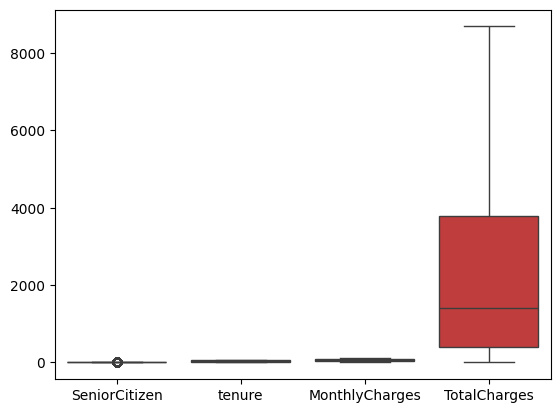

In [10]:
sns.boxplot(df)

#### Missing Values

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.loc[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df.TotalCharges.describe().T

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
df.TotalCharges.median()

1397.475

In [15]:
df.TotalCharges.fillna(df.TotalCharges.median())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## Data Visualization

In [16]:
categoical_columns = ['gender', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
numerical_but_categorical = ['SeniorCitizen']
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

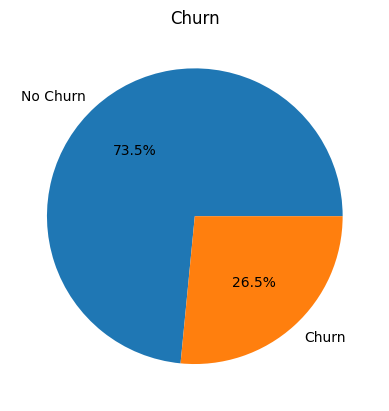

In [17]:
plt.pie(df.Churn.value_counts(), labels=['No Churn','Churn'], autopct='%1.1f%%')
plt.title('Churn')
plt.show()

gender
Male      3555
Female    3488
Name: count, dtype: int64


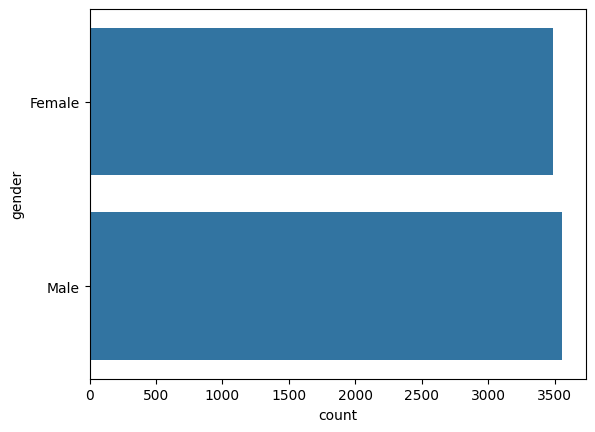

Partner
No     3641
Yes    3402
Name: count, dtype: int64


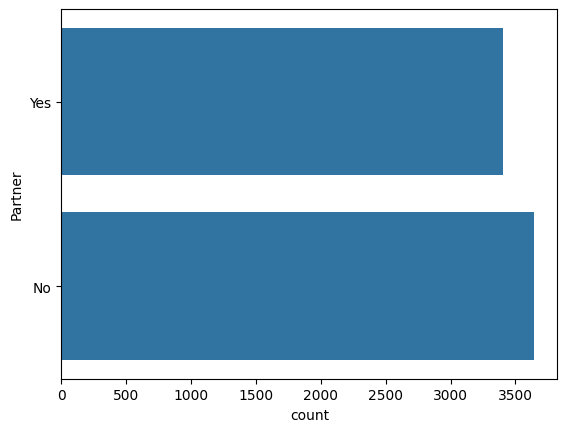

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


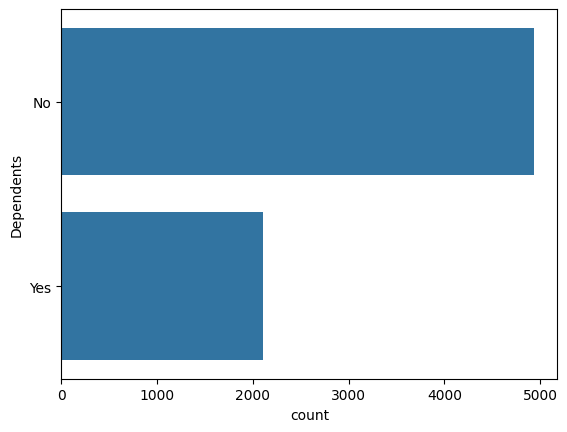

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


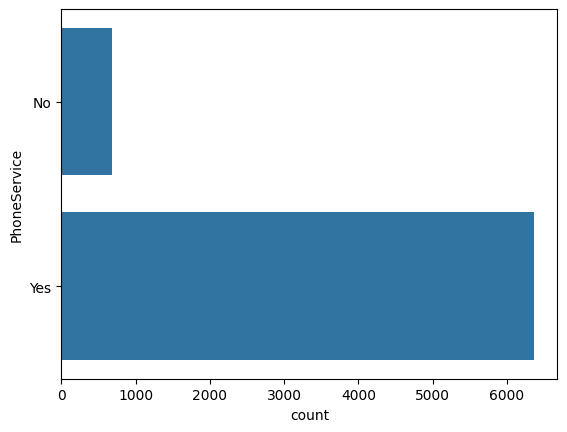

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


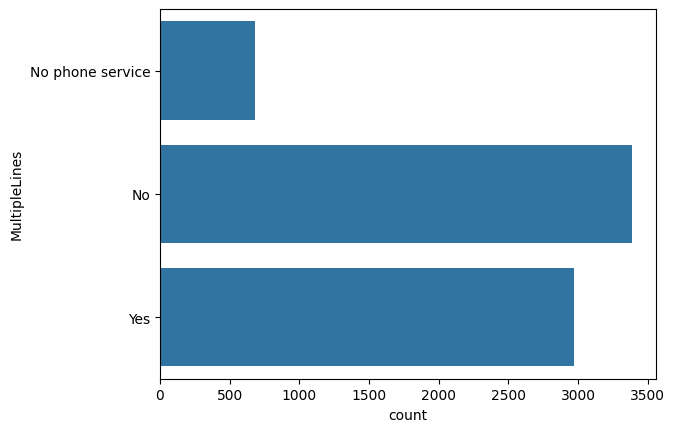

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


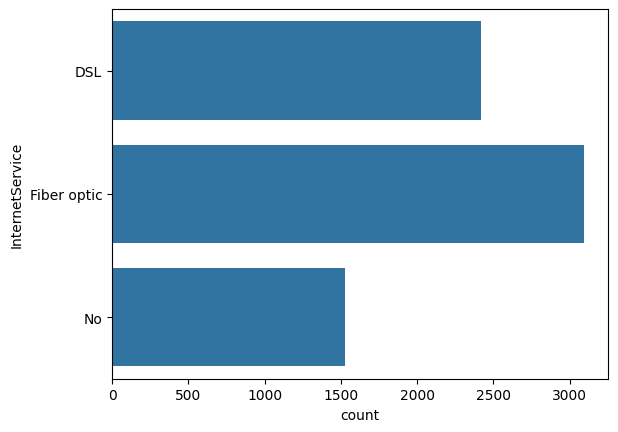

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


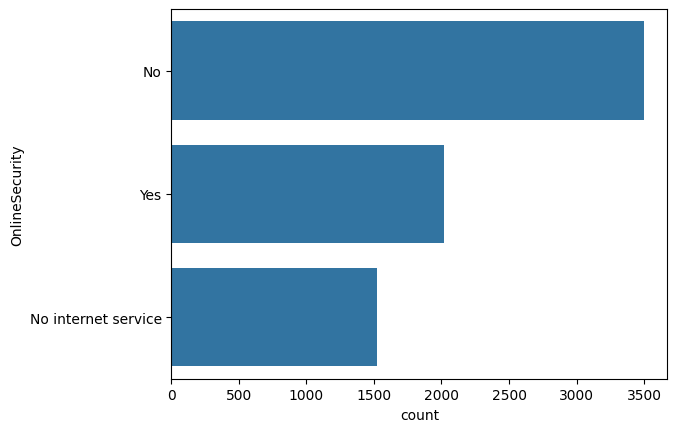

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


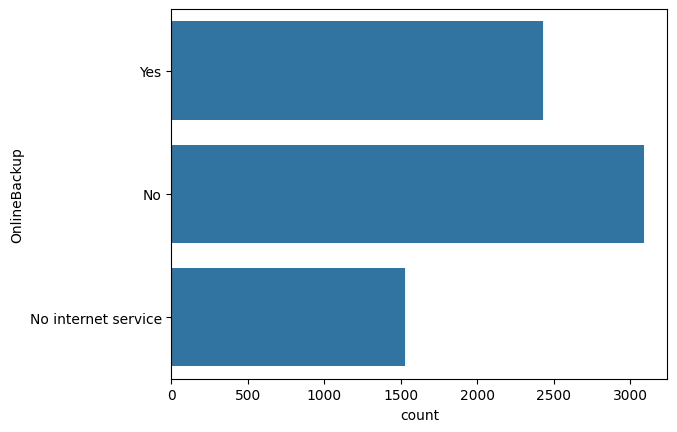

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


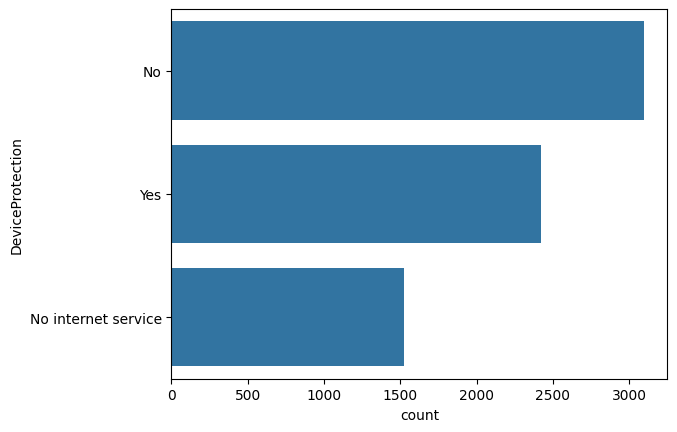

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


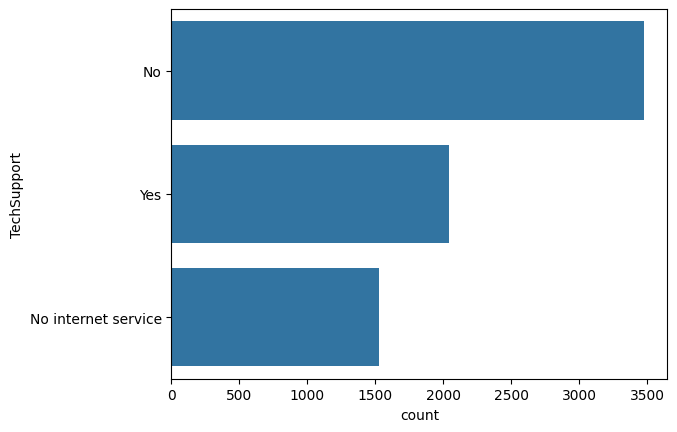

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


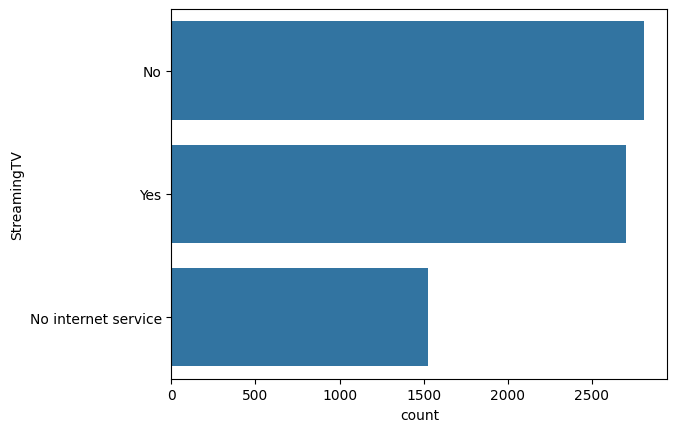

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


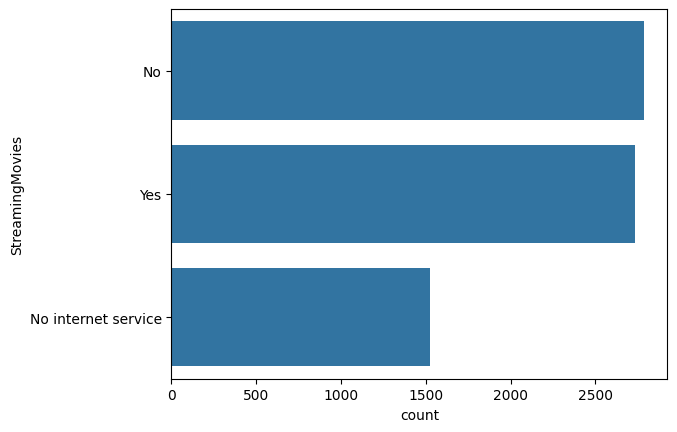

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


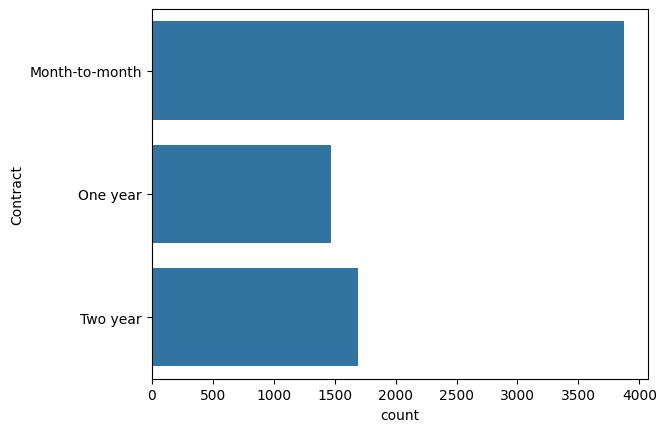

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


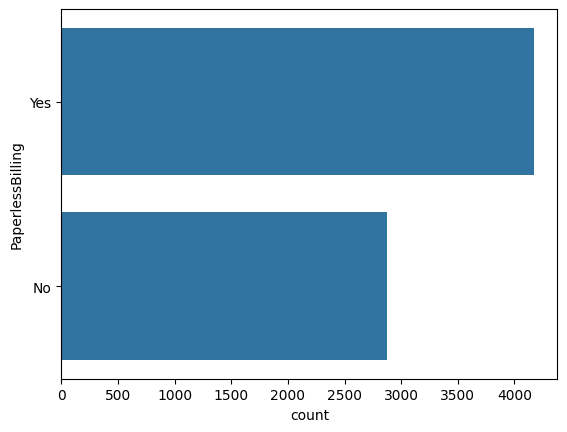

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


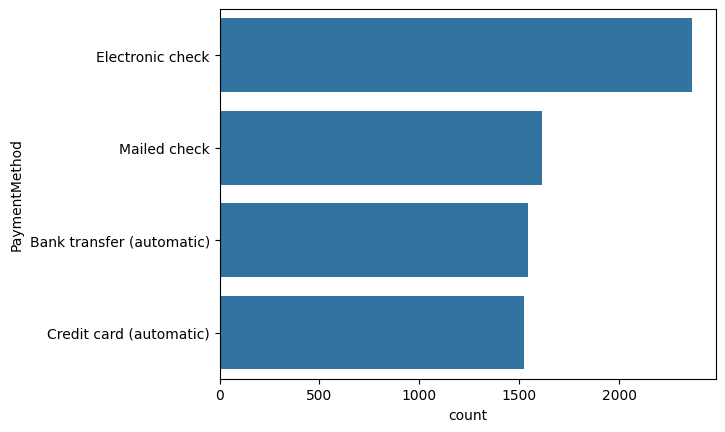

Churn
No     5174
Yes    1869
Name: count, dtype: int64


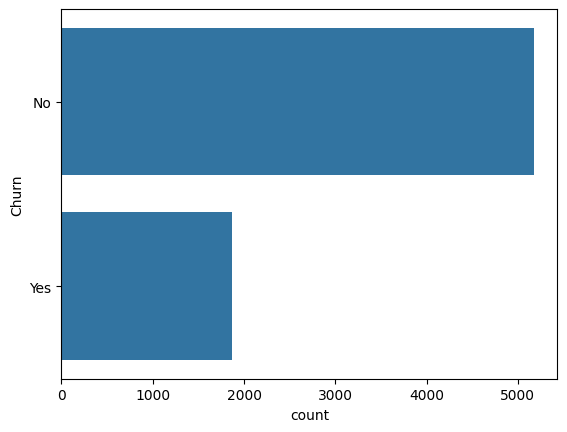

In [18]:
for col in categoical_columns:
    sns.countplot(y=df[col],data=df)
    print(df[col].value_counts())
    plt.show()

In [19]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [20]:
corr = df[numerical_columns].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


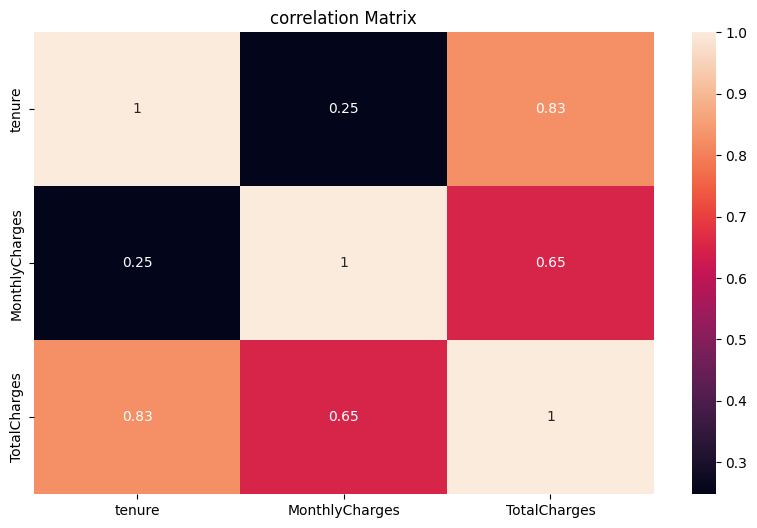

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.title('correlation Matrix')
plt.show()

## Encoding

In [172]:
label_enc = LabelEncoder()
df["gender"] = label_enc.fit_transform(df["gender"])
df['Partner'] = label_enc.fit_transform(df["Partner"])
df['Dependents'] = label_enc.fit_transform(df["Dependents"])
df['PhoneService'] = label_enc.fit_transform(df["PhoneService"])
df['PaperlessBilling'] = label_enc.fit_transform(df["PaperlessBilling"])
df['Churn'] = label_enc.fit_transform(df["Churn"])

In [ ]:
def col_encoding(df, columns):
    label_enc = LabelEncoder()
    for col in columns:
        df[col] = label_enc.fit_transform(df[col])
    return df

columns_to_encode = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
encoded_df = col_encoding(df, columns_to_encode)

In [174]:
oneht_col = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
             'StreamingMovies','Contract','PaymentMethod']
df = pd.get_dummies(df, columns=oneht_col, drop_first=True,dtype=int)

In [175]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,0,0,0,0,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,0,0,0,0,0,0,0,0,0,1


## Feature Scaling 

In [179]:
df[numerical_columns]


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [181]:
norm = MinMaxScaler()
df[numerical_columns] = norm.fit_transform(df[numerical_columns])

In [182]:
df[numerical_columns]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


## Feature Extraction